## Test dates

En esta notebook chequeamos las fechas de los artículos

In [1]:
%load_ext autoreload
%autoreload 2
import json
import json
from mongoengine import connect
from tweepyrate import create_apps
from hatespeech_models import Tweet, Article

client = connect("hatespeech-news")

db = client["hatespeech-news"]

print(f"Tenemos {Article.objects.count()} artículos")

Tenemos 141765 artículos


Casi dos meses más de datos

Fecha mínima: 10 de Febrero de 2020

Fecha máxima: 29 de Julio   de 2020


/home/jmperez/.local/share/virtualenvs/hatespeech-collection-qaK7Gomm/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


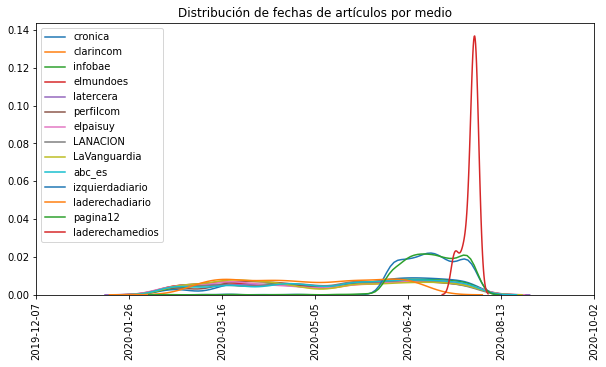

In [2]:
from collections import defaultdict
import datetime
from hate_collector.plot import distplot_dates
import matplotlib.pyplot as plt


dates_by_newspaper = defaultdict(list)

arts =  Article.objects(created_at__gte=datetime.datetime(2020, 2, 10))

for art in arts.only('created_at', 'user'):
    dates_by_newspaper[art.user].append(art.created_at)
    

plt.figure(figsize=(10, 5))

for newspaper, dates in dates_by_newspaper.items():
    distplot_dates(dates, label=newspaper, hist=False)
    
plt.legend()
plt.title("Distribución de fechas de artículos por medio");

plt.savefig("pepe.png")


Hay un problema con `infobae`

In [3]:
dates_by_newspaper.keys()

dict_keys(['cronica', 'clarincom', 'infobae', 'elmundoes', 'latercera', 'perfilcom', 'elpaisuy', 'LANACION', 'LaVanguardia', 'abc_es', 'izquierdadiario', 'laderechadiario', 'pagina12', 'laderechamedios'])

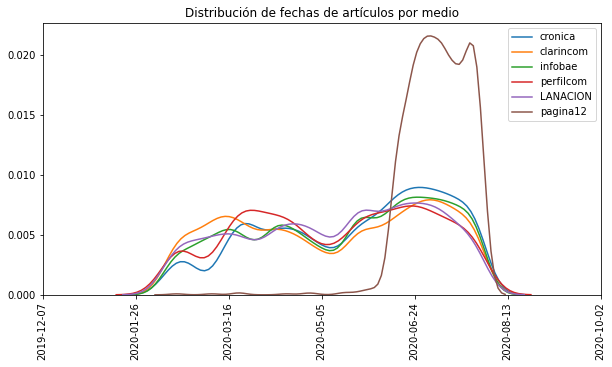

In [4]:

importantes = [
    "cronica", "clarincom", "infobae", "perfilcom","LANACION", "pagina12"
]

plt.figure(figsize=(10, 5))

for newspaper in importantes:
    dates = dates_by_newspaper[newspaper]
    distplot_dates(dates, label=newspaper, hist=False)
    
plt.legend()
plt.title("Distribución de fechas de artículos por medio");

plt.savefig("pepe.png")


Todo bien!

## Artículos vacíos

In [7]:
Article.objects(body="")

[1235915573768474624 - infobae
Spotify Awards: así lucieron los artistas en la alfombra verde

(17 comentarios)
Tweet:
Así lucieron los artistas en la alfombra verde de los #SpotifyAwards https://t.co/2TqoS63Gyn
    , 1243902615584485378 - infobae
Un mundo sin gente: 23 fotos aéreas de ciudades casi vacías por la pandemia de coronavirus

(3 comentarios)
Tweet:
Un mundo sin gente: 23 fotos aéreas de ciudades casi vacías por la pandemia de coronavirus https://t.co/JtnYi6xWry
    , 1243997258976301056 - infobae
Un mundo sin gente: 23 fotos aéreas de ciudades casi vacías por la pandemia de coronavirus

(5 comentarios)
Tweet:
Un mundo sin gente: 23 fotos aéreas de ciudades casi vacías por la pandemia de #coronavirus https://t.co/0D6PgUcufx https://t.co/OgIjfhv57j
    ]

Perfecto! sólo 3 artículos vacíos